# IMPORT MODULES:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# LOADING THE DATASET:

In [2]:
df = pd.read_csv('C:/Users/shris/Downloads/IOT Notes/winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# PREPROCESSING THE DATA:

In [6]:
# null values:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# filling the missing values:
for col , value in df.items():
    if col != 'type': # type col -> object datatype
        df[col] = df[col].fillna(df[col].mean())

In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EXPLORATORY DATA ANALYSIS:

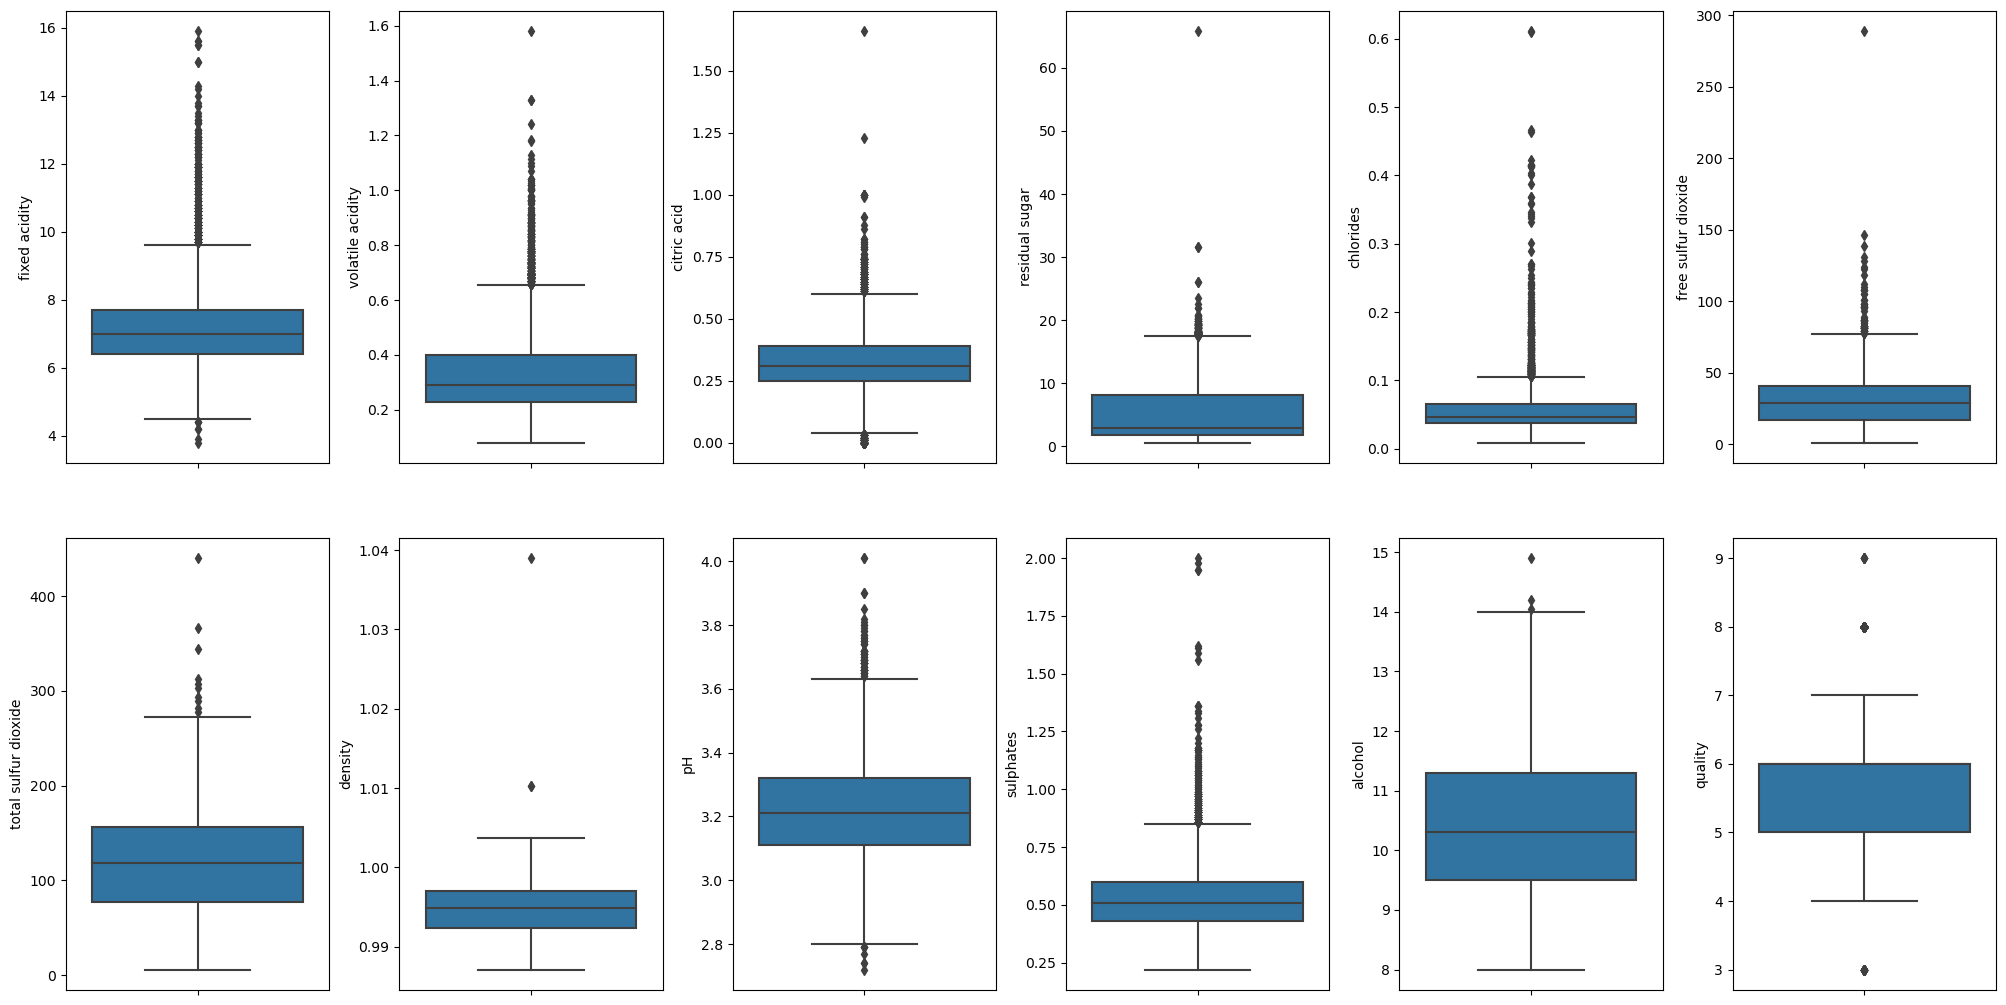

In [9]:
# box plots:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

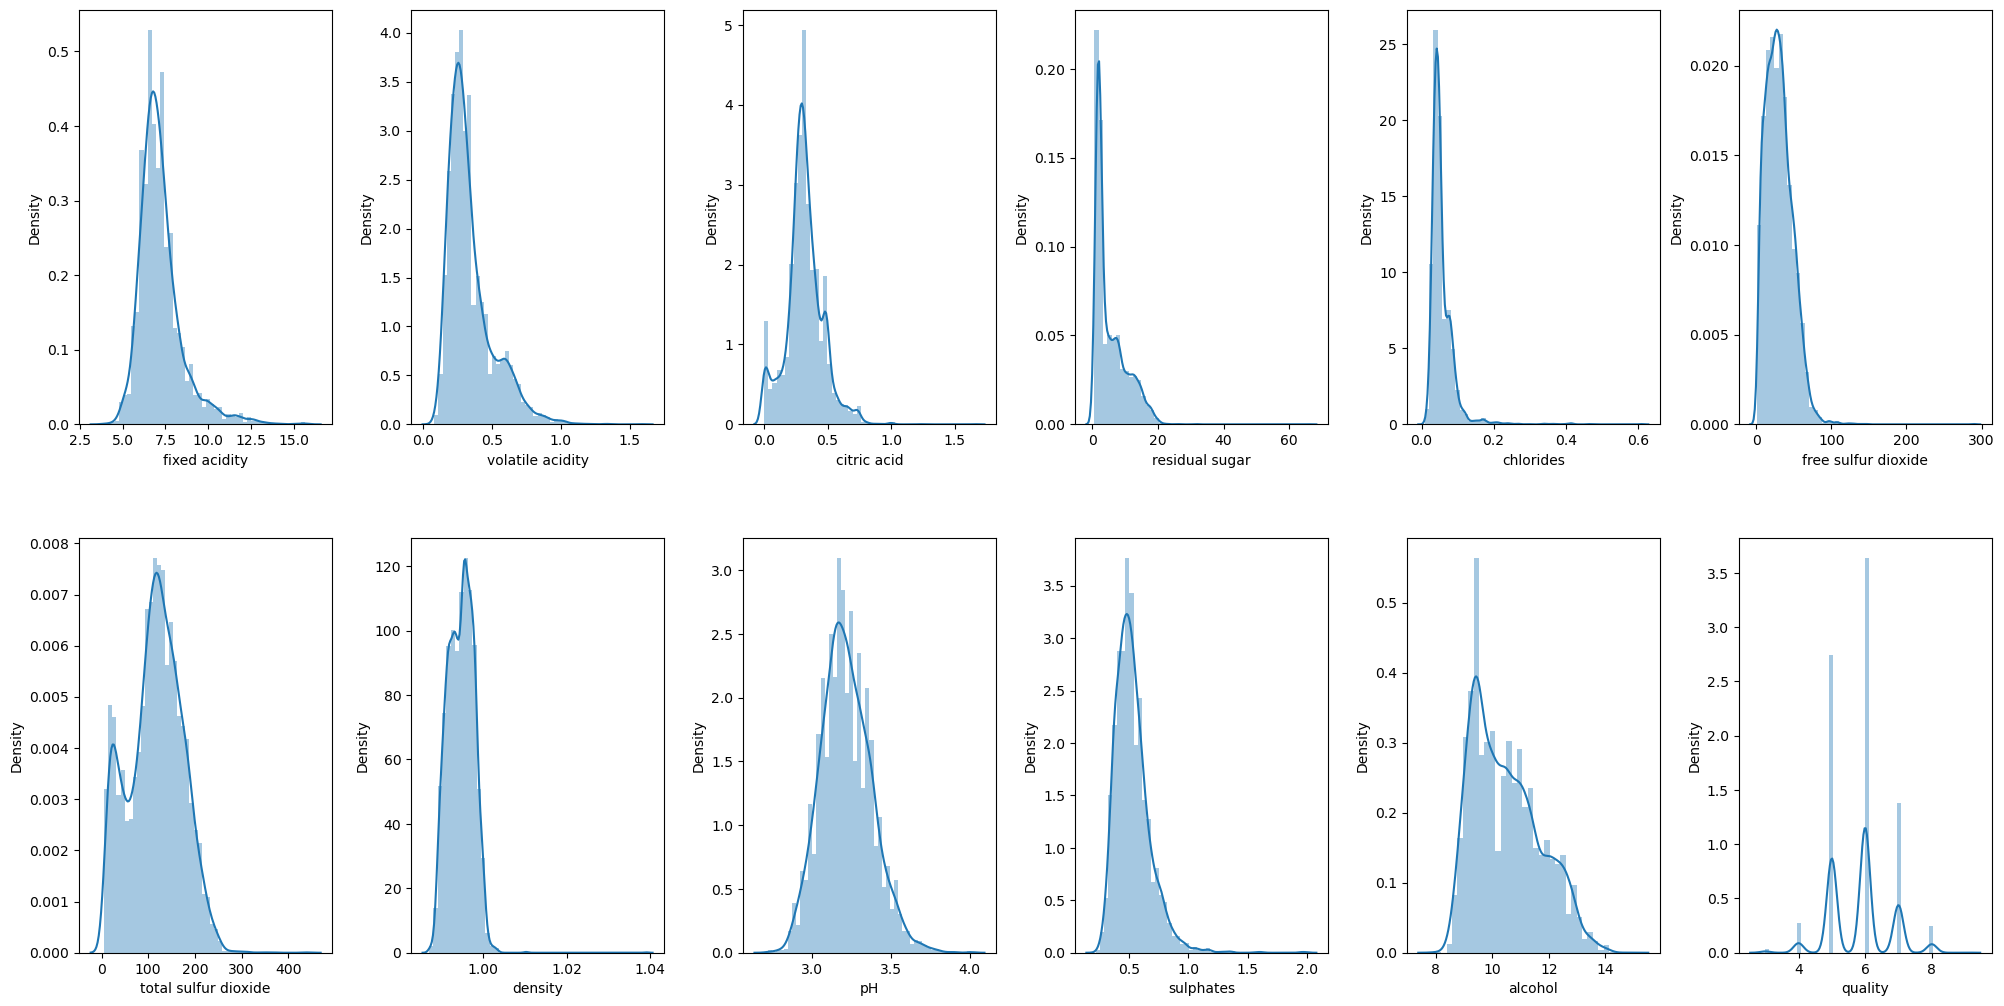

In [10]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [11]:
# log transformation:
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

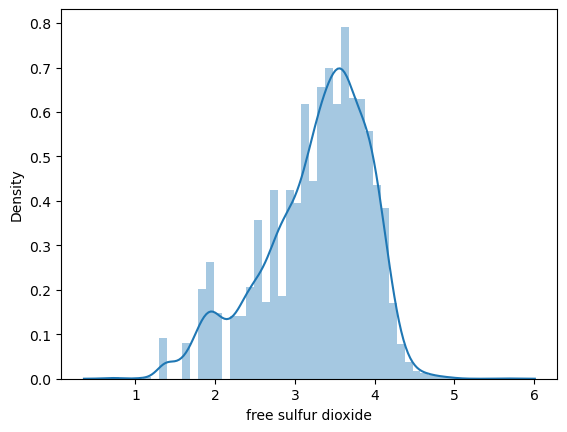

In [12]:
sns.distplot(df['free sulfur dioxide'])

<Axes: xlabel='type', ylabel='count'>

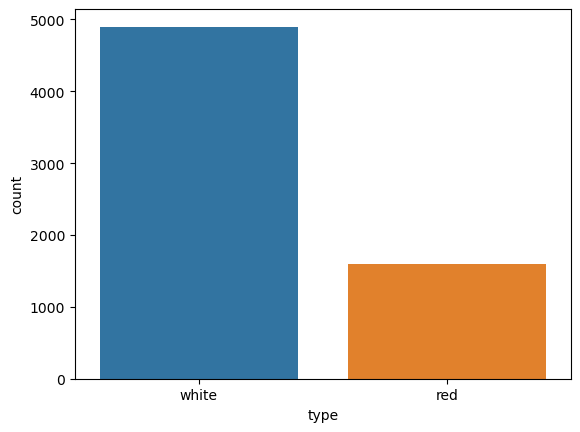

In [14]:
sns.countplot(x=df['type'], data=df)

<Axes: xlabel='quality', ylabel='count'>

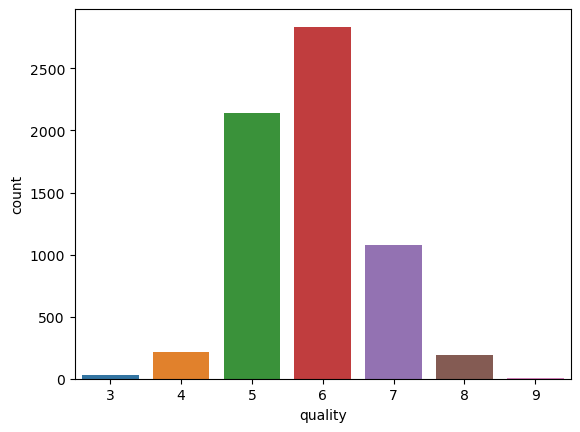

In [16]:
sns.countplot(x=df['quality'], data=df)

# COORELATION MATRIX:

In [17]:
corr = df.corr()

<Axes: >

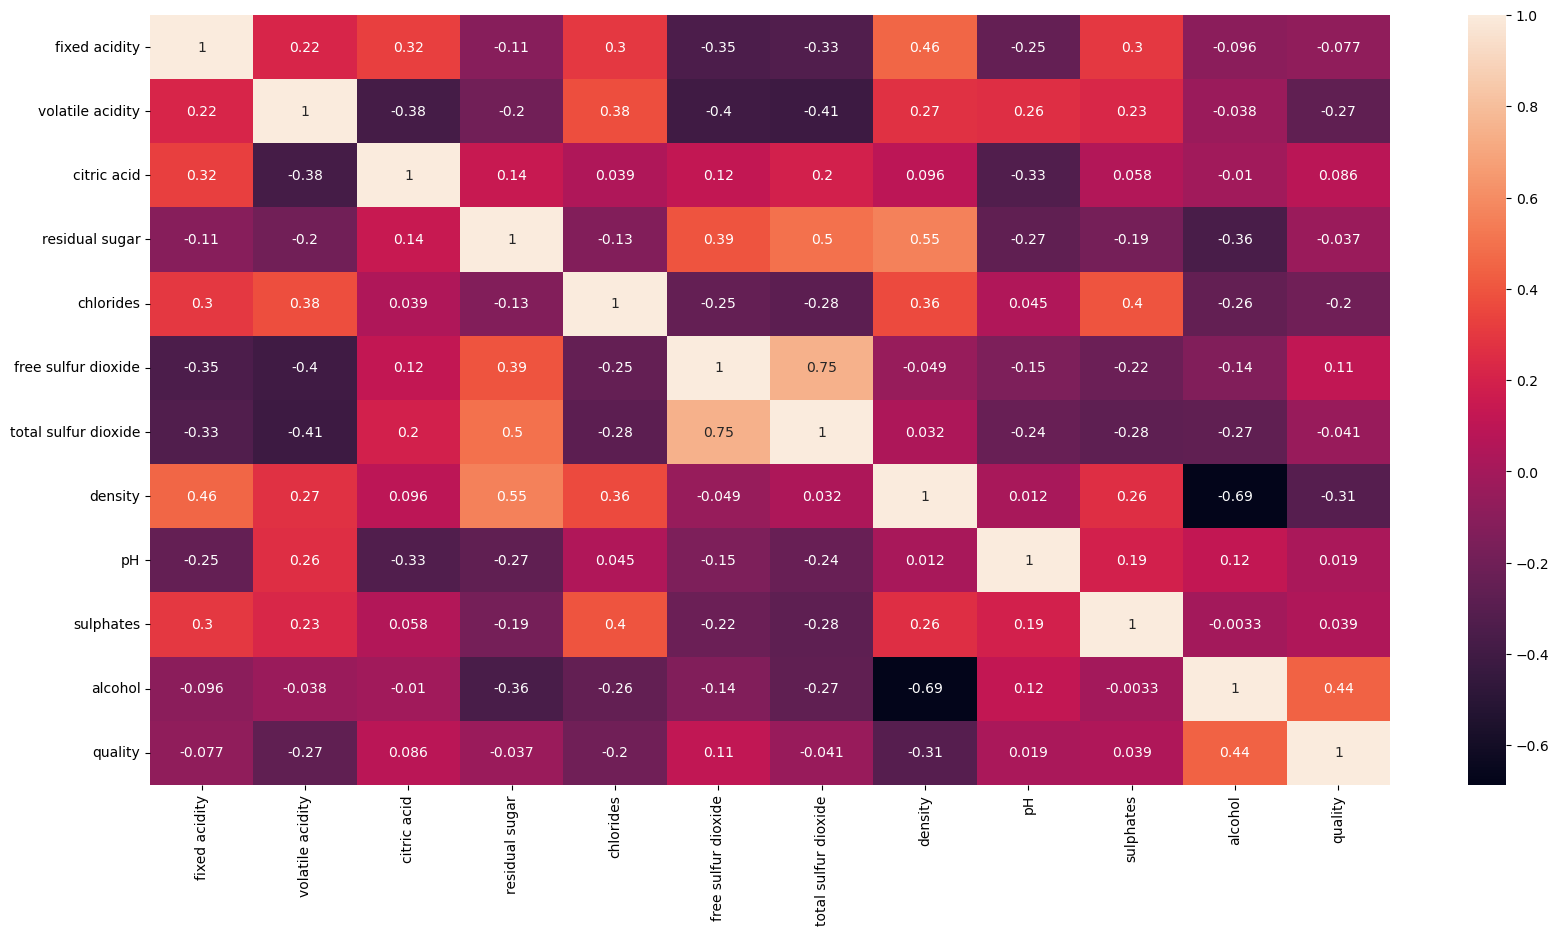

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(corr , annot = True )

# INPUT SPLIT:

In [19]:
X = df.drop(columns=['type', 'quality'])

In [20]:
y = df['quality']

# CLASS IMBALANCEMENT:

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [23]:
oversample = SMOTE(k_neighbors=4)

In [24]:
X, y = oversample.fit_resample(X, y)

In [25]:
y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

# MODEL TRAINING:

In [93]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
from natsort import index_natsorted
df_temp = df.copy()
df_temp = df_temp.sort_values(
    by="alcohol",
    key=lambda x: np.argsort(index_natsorted(df_temp["alcohol"]))
)
#print(df_temp.head())
X1 = df_temp.drop(columns=["quality", "type"])
X1 = X1.iloc[100:500, :]
y1 = df_temp["quality"][100:500]

In [132]:
def comparison_graph(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(X1)
    plt.scatter(X1['alcohol'], y1, c="black", s=200)
#     plt.plot(X1['alcohol'], y1,c="black")
    plt.scatter(X1['alcohol'], y_pred, c="red", s=50)
#     plt.plot(X1['alcohol'], y_pred, c="red")
    plt.xlabel("Alcohol content")
    plt.ylabel("Quality level")
    plt.title("Actual vs Predicted values")
    txt1="Prediced values are represented by red"
    txt2="Actual values are represented by black"
    plt.figtext(0.3, -0.02, txt1, wrap=True, horizontalalignment='center', fontsize=8, c="red")
    plt.figtext(0.3, -0.04, txt2, wrap=True, horizontalalignment='center', fontsize=8, c="black")
    plt.show()
    print(classification_report(y1, y_pred))
    conf_matrix = confusion_matrix(y1, y_pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.show()

In [27]:
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [28]:
from sklearn.linear_model import LogisticRegression

In [136]:
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [137]:
classify(logreg_model, X, y)

Accuracy: 36.14749143663107
CV Score: 32.76724895289337


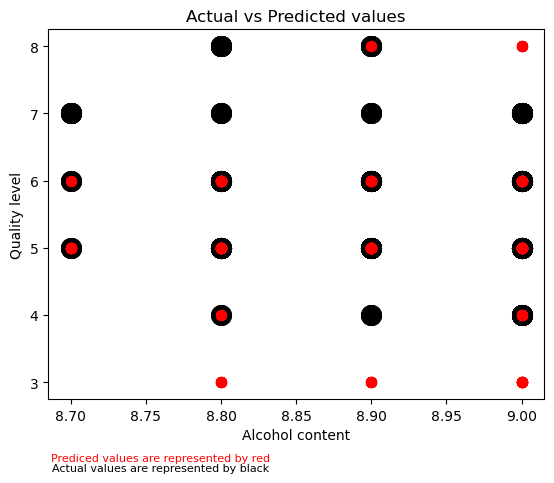

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        16
           5       0.41      0.53      0.47       178
           6       0.49      0.43      0.46       139
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00        17

    accuracy                           0.39       400
   macro avg       0.15      0.16      0.15       400
weighted avg       0.35      0.39      0.37       400



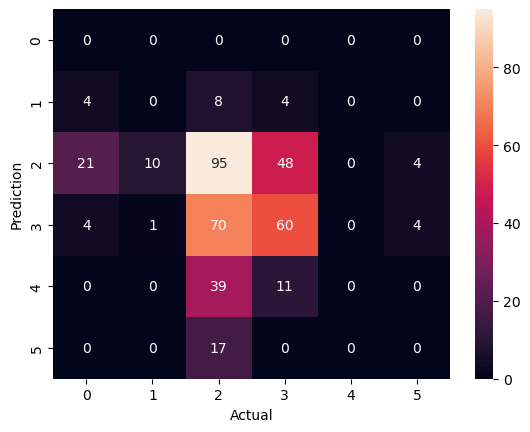

In [138]:
#Comparison graphs for logistic regression
comparison_graph(logreg_model)

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
classify(dtree_model, X, y)

Accuracy: 79.75015111827524
CV Score: 75.27711551062583


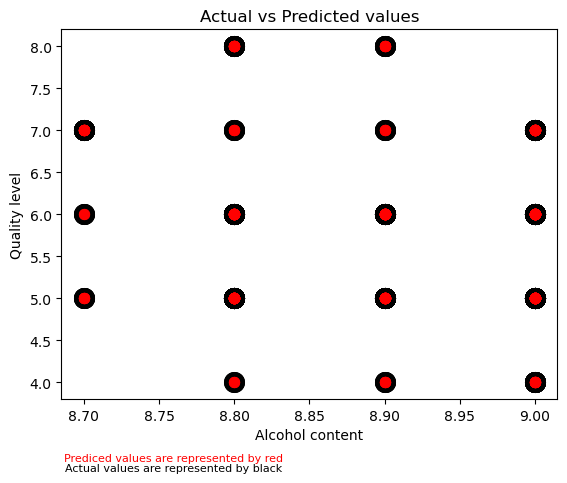

              precision    recall  f1-score   support

           4       0.78      0.88      0.82        16
           5       0.97      0.94      0.95       178
           6       0.94      0.95      0.94       139
           7       1.00      0.98      0.99        50
           8       0.94      1.00      0.97        17

    accuracy                           0.95       400
   macro avg       0.92      0.95      0.94       400
weighted avg       0.95      0.95      0.95       400



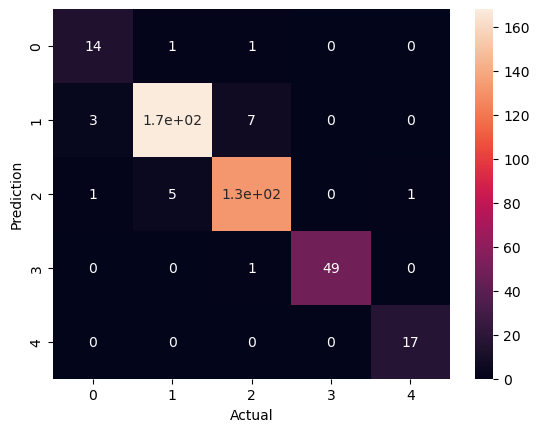

In [140]:
#Comparison graphs for Decision Tree Classifier
comparison_graph(dtree_model)

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
classify(rf_model, X, y)

Accuracy: 88.03143260124925
CV Score: 82.35951961544878


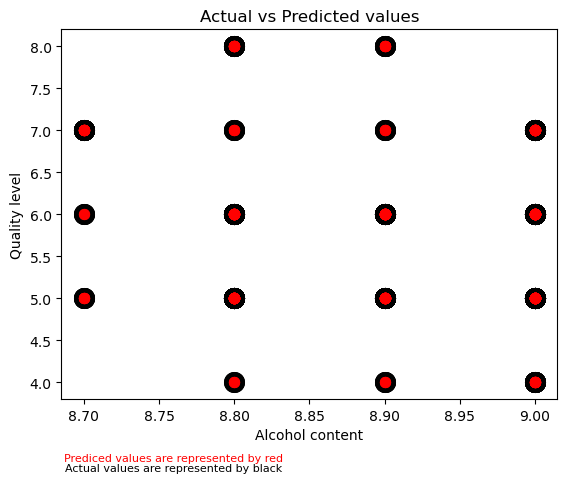

              precision    recall  f1-score   support

           4       0.94      1.00      0.97        16
           5       0.96      0.98      0.97       178
           6       0.99      0.96      0.97       139
           7       1.00      0.98      0.99        50
           8       1.00      1.00      1.00        17

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.97      0.98       400



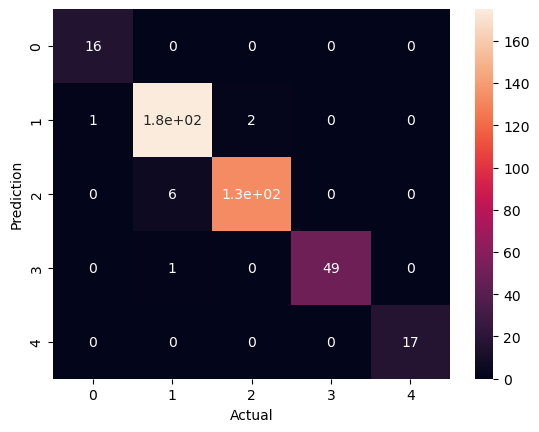

In [142]:
#Comparison graphs for Random Forest Classifier
comparison_graph(rf_model)

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
etree_model = ExtraTreesClassifier()
classify(etree_model, X, y)

Accuracy: 88.59560749546645
CV Score: 83.34179856858954


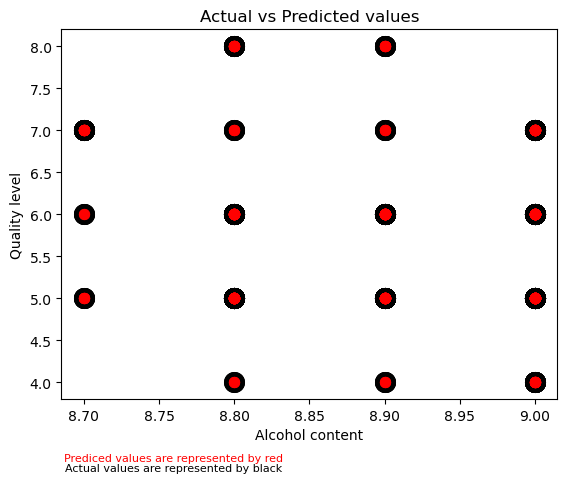

              precision    recall  f1-score   support

           4       0.94      1.00      0.97        16
           5       0.96      0.98      0.97       178
           6       0.99      0.96      0.97       139
           7       1.00      0.98      0.99        50
           8       1.00      1.00      1.00        17

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.97      0.98       400



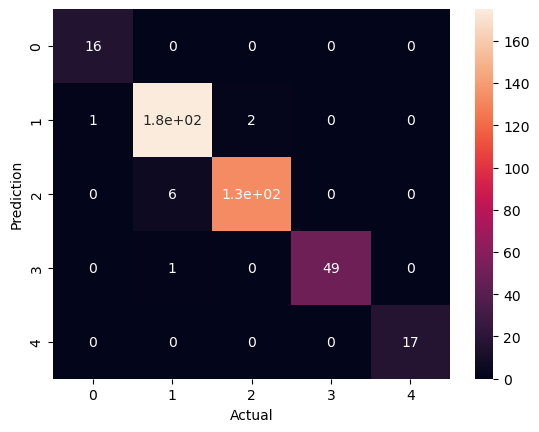

In [144]:
#Comparison graphs for Extra trees Classifier
comparison_graph(etree_model)

In [145]:
import lightgbm 
lgbm_model = lightgbm.LGBMClassifier()
classify(lgbm_model, X, y)

Accuracy: 86.70159177916584
CV Score: 80.54630453660575


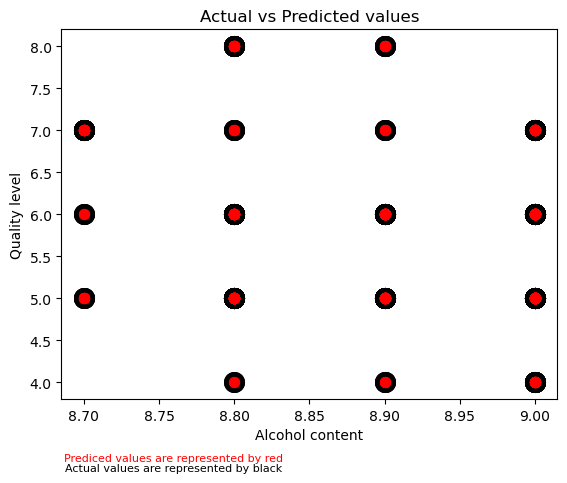

              precision    recall  f1-score   support

           4       0.74      0.88      0.80        16
           5       0.90      0.95      0.92       178
           6       0.95      0.88      0.91       139
           7       1.00      0.96      0.98        50
           8       1.00      1.00      1.00        17

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.93      0.93      0.93       400



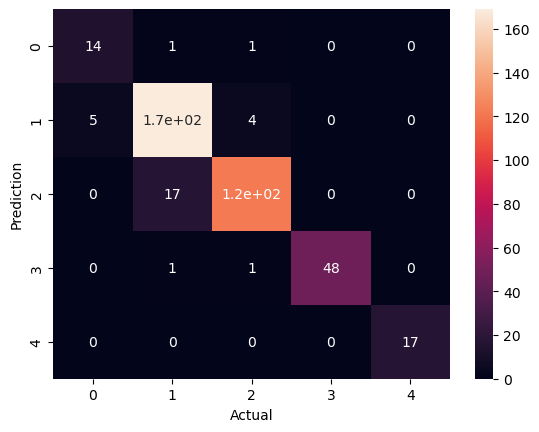

In [146]:
#Comparison graphs for LGBM Classifier
comparison_graph(lgbm_model)

In [148]:
#Extra trees classifier has performed the best
#Extra trees model is saved

from joblib import Parallel, delayed
import joblib

joblib.dump(etree_model, 'model.joblib')

['model.joblib']